In [116]:
from sklearn.datasets import fetch_openml 
import numpy as np
from __future__ import print_function
import time
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

mnist = fetch_openml('mnist_784', version=1, as_frame=False) 
mnist.target = mnist.target.astype(np.uint8) 
X = mnist["data"] 
y = mnist["target"]

In [117]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [118]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [123]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [145]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

In [146]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, learning_rate='auto',
                   init='random')
tsne_results = tsne.fit_transform(df_subset)
#print(tsne_results)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.026s...
[t-SNE] Computed neighbors for 10000 samples in 4.338s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 540.084775
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.826118
[t-SNE] KL divergence after 300 iterations: 2.789941
t-SNE done! Time elapse

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

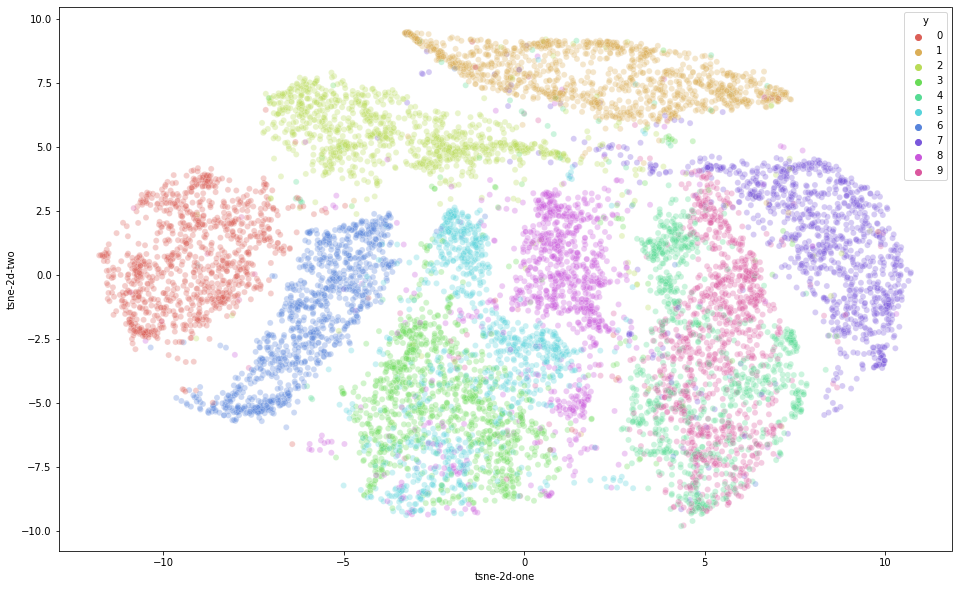

In [147]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [160]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445]


In [162]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('pca', pca), ('tsne', tsne)])
pca_tsne_results = pipeline.fit_transform(df_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 0.221s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 32.037003
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.655708
[t-SNE] KL divergence after 1000 iterations: 0.755594


<AxesSubplot:xlabel='pca_tsne-2d-one', ylabel='pca_tsne-2d-two'>

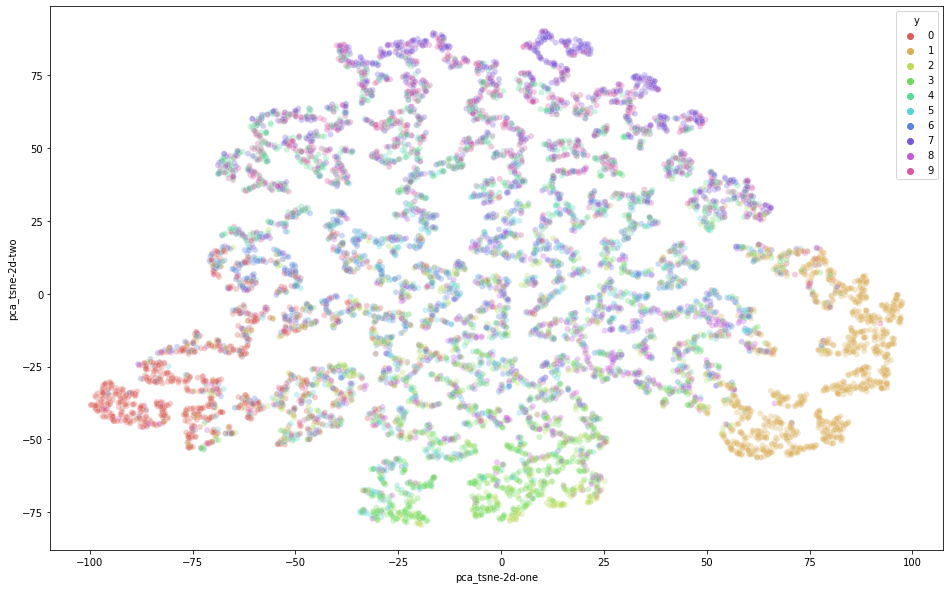

In [164]:
df_subset['pca_tsne-2d-one'] = pca_tsne_results[:,0]
df_subset['pca_tsne-2d-two'] = pca_tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca_tsne-2d-one", y="pca_tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='pca_tsne-2d-one', ylabel='pca_tsne-2d-two'>

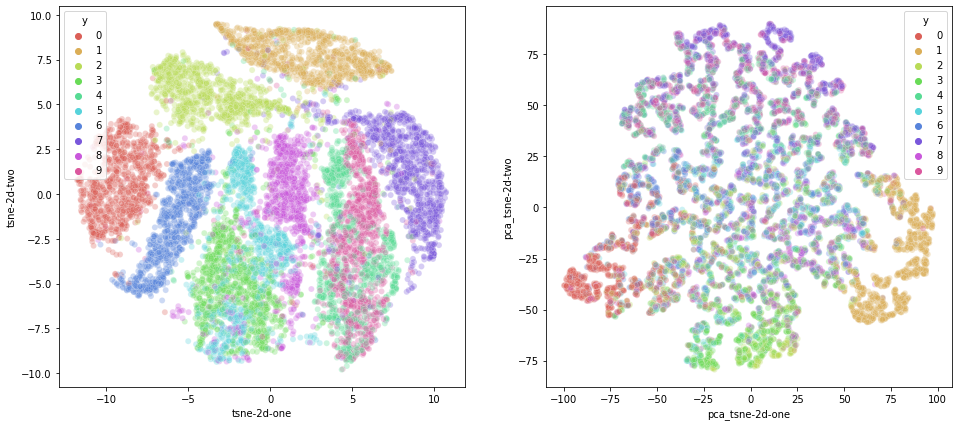

In [165]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="pca_tsne-2d-one", y="pca_tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)




In [173]:
C = np.linspace(0.03, 0.05, 5)

parameter_candidates = [
  {'C': C, 'kernel': ['linear']},
  {'C': C, 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [174]:
# Create dataset 1
data1_features = mnist.data[:1000]
data1_target = mnist.target[:1000]

# Create dataset 2
data2_features = mnist.data[1000:]
data2_target = mnist.target[1000:]

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(data1_features, data1_target)   

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': array([0.03 , 0.035, 0.04 , 0.045, 0.05 ]),
                          'kernel': ['linear']},
                         {'C': array([0.03 , 0.035, 0.04 , 0.045, 0.05 ]),
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']}])

In [176]:
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 0.03
Best Kernel: linear
Best Gamma: scale


In [178]:
clf.score(data2_features, data2_target) 


0.8736956521739131

In [181]:
# Train a new classifier using the best parameters found by the grid search
svm.SVC(C=0.03, kernel='linear', gamma='scale').fit(data1_features, data1_target).score(data2_features, data2_target)

0.8736956521739131